In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the dataset
df = pd.read_csv("/content/marketing_sales_data.csv")

In [ ]:
# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         572 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


(None,
        TV      Radio  Social Media Influencer       Sales
 0     Low   3.518070      2.293790      Micro   55.261284
 1     Low   7.756876      2.572287       Mega   67.574904
 2    High  20.348988      1.227180      Micro  272.250108
 3  Medium  20.108487      2.728374       Mega  195.102176
 4    High  31.653200      7.776978       Nano  273.960377)

In [ ]:
print(df_info)

None


In [ ]:
print(df_head)

       TV      Radio  Social Media Influencer       Sales
0     Low   3.518070      2.293790      Micro   55.261284
1     Low   7.756876      2.572287       Mega   67.574904
2    High  20.348988      1.227180      Micro  272.250108
3  Medium  20.108487      2.728374       Mega  195.102176
4    High  31.653200      7.776978       Nano  273.960377


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()


In [ ]:
print(missing_values)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


In [ ]:
# Apply Label Encoding
label_encoder_tv = LabelEncoder()
label_encoder_influencer = LabelEncoder()

# Apply encoding before get_dummies
df["TV_encoded"] = label_encoder_tv.fit_transform(df["TV"])
df["Influencer_encoded"] = label_encoder_influencer.fit_transform(df["Influencer"])

# Now Create df_encoded with get_dummies using the encoded columns
df_encoded = pd.get_dummies(df, columns=["TV_encoded", "Influencer_encoded"],
                           prefix=["TV", "Influencer"], drop_first=True) # Using prefix to name columns

print(df_encoded.head())

       TV      Radio  Social Media Influencer       Sales   TV_1   TV_2  \
0     Low   3.518070      2.293790      Micro   55.261284   True  False   
1     Low   7.756876      2.572287       Mega   67.574904   True  False   
2    High  20.348988      1.227180      Micro  272.250108  False  False   
3  Medium  20.108487      2.728374       Mega  195.102176  False   True   
4    High  31.653200      7.776978       Nano  273.960377  False  False   

   Influencer_1  Influencer_2  Influencer_3  
0         False          True         False  
1          True         False         False  
2         False          True         False  
3          True         False         False  
4         False         False          True  


In [ ]:
df_encoded = pd.get_dummies(df, columns=["TV", "Influencer"], drop_first=True)
print(df_encoded.head())


       Radio  Social Media       Sales  TV_encoded  Influencer_encoded  \
0   3.518070      2.293790   55.261284           1                   2   
1   7.756876      2.572287   67.574904           1                   1   
2  20.348988      1.227180  272.250108           0                   2   
3  20.108487      2.728374  195.102176           2                   1   
4  31.653200      7.776978  273.960377           0                   3   

   TV_Low  TV_Medium  Influencer_Mega  Influencer_Micro  Influencer_Nano  
0    True      False            False              True            False  
1    True      False             True             False            False  
2   False      False            False              True            False  
3   False       True             True             False            False  
4   False      False            False             False             True  


In [ ]:
# Summary statistics for numerical columns
summary_stats = df.describe()

In [ ]:
print(summary_stats)

            Radio  Social Media       Sales  TV_encoded  Influencer_encoded
count  572.000000    572.000000  572.000000  572.000000          572.000000
mean    17.520616      3.333803  189.296908    1.068182            1.590909
std      9.290933      2.238378   89.871581    0.803169            1.112162
min      0.109106      0.000031   33.509810    0.000000            0.000000
25%     10.699556      1.585549  118.718722    0.000000            1.000000
50%     17.149517      3.150111  184.005362    1.000000            2.000000
75%     24.606396      4.730408  264.500118    2.000000            3.000000
max     42.271579     11.403625  357.788195    2.000000            3.000000


In [ ]:
# Unique values in categorical columns
unique_tv = df["TV"].unique()
unique_influencer = df["Influencer"].unique()

unique_tv, unique_influencer


(array(['Low', 'High', 'Medium'], dtype=object),
 array(['Micro', 'Mega', 'Nano', 'Macro'], dtype=object))

In [ ]:
# Set plot style
sns.set_style("whitegrid")


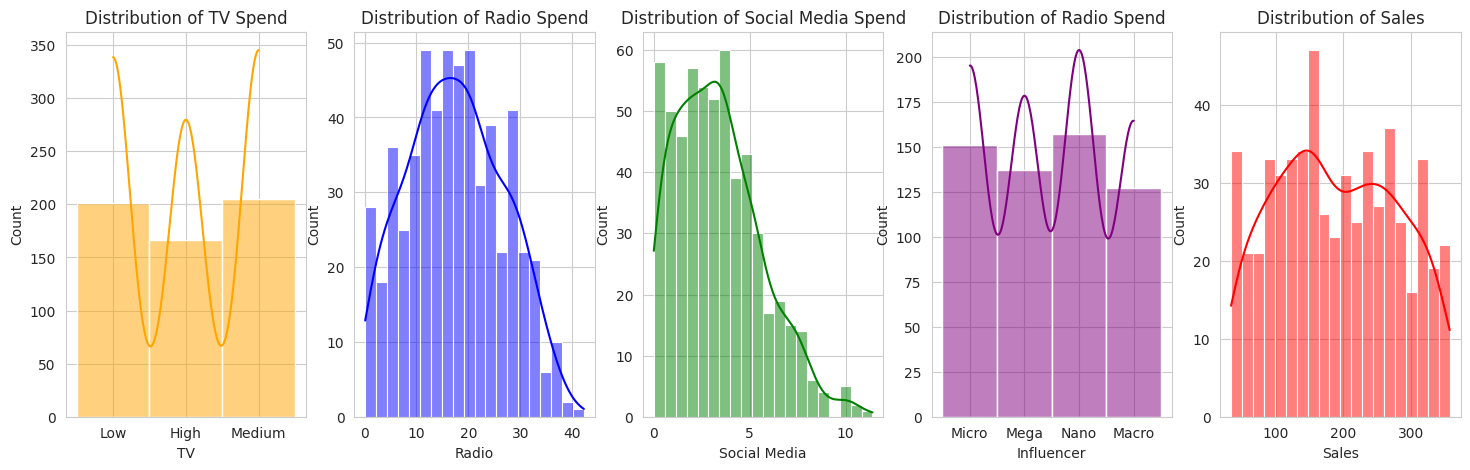

In [ ]:
# Create histograms for numerical columns
fig, axes = plt.subplots(1, 5, figsize=(18, 5))

sns.histplot(df["TV"], bins=20, kde=True, ax=axes[0], color='orange')
axes[0].set_title("Distribution of TV Spend")

sns.histplot(df["Radio"], bins=20, kde=True, ax=axes[1], color='blue')
axes[1].set_title("Distribution of Radio Spend")

sns.histplot(df["Social Media"], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title("Distribution of Social Media Spend")

sns.histplot(df["Influencer"], bins=20, kde=True, ax=axes[3], color='purple')
axes[3].set_title("Distribution of Radio Spend")

sns.histplot(df["Sales"], bins=20, kde=True, ax=axes[4], color='red')
axes[4].set_title("Distribution of Sales")

plt.show()

In [ ]:
# Compute correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()


In [ ]:
# Extract correlation values with "Sales"
sales_correlation = correlation_matrix["Sales"].sort_values(ascending=False)

correlation_matrix, sales_correlation

(                       Radio  Social Media     Sales  TV_encoded  \
 Radio               1.000000      0.629941  0.858036   -0.395841   
 Social Media        0.629941      1.000000  0.542048   -0.262081   
 Sales               0.858036      0.542048  1.000000   -0.419153   
 TV_encoded         -0.395841     -0.262081 -0.419153    1.000000   
 Influencer_encoded  0.033915      0.017812  0.028573   -0.047143   
 
                     Influencer_encoded  
 Radio                         0.033915  
 Social Media                  0.017812  
 Sales                         0.028573  
 TV_encoded                   -0.047143  
 Influencer_encoded            1.000000  ,
 Sales                 1.000000
 Radio                 0.858036
 Social Media          0.542048
 Influencer_encoded    0.028573
 TV_encoded           -0.419153
 Name: Sales, dtype: float64)

In [ ]:
# Convert 'TV' column to numeric, handling non-numeric values
df['TV'] = pd.to_numeric(df['TV'], errors='coerce')

# Convert 'Influencer' column to numeric, handling non-numeric values
df['Influencer'] = pd.to_numeric(df['Influencer'], errors='coerce')

In [ ]:
# Compute correlation matrix
correlation_matrix = df[['TV_encoded', 'Radio', 'Social Media', 'Influencer_encoded', 'Sales']].corr()


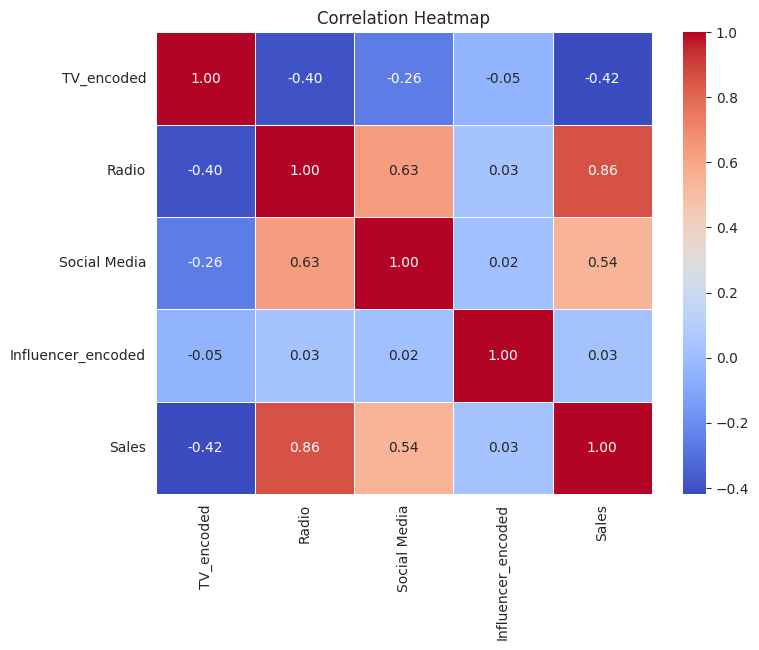

In [ ]:
# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Extract correlation with Sales
sales_correlation = correlation_matrix["Sales"].sort_values(ascending=False)
print(sales_correlation)

Sales                 1.000000
Radio                 0.858036
Social Media          0.542048
Influencer_encoded    0.028573
TV_encoded           -0.419153
Name: Sales, dtype: float64
